# 3. Machine Learning

# **<u> Aprendizaje Automático  </u>**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [104]:
variables_numericas = ['Age', 'StudyTimeWeekly', 'Absences']
df_numericas = df[variables_numericas]

def identificar_outliers(df, col_categorica, col_cuantitativa):
  outliers = pd.DataFrame() 
  
  for categoria in df[col_categorica].unique(): 
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa] 
    Q1 = data_categoria.quantile(0.25) 
    Q3 = data_categoria.quantile(0.75) 
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR 
    limite_superior = Q3 + 1.5 * IQR 
    outliers_categoria = data_categoria[(data_categoria < limite_inferior) | (data_categoria > limite_superior)] 
    outliers = pd.concat([outliers, outliers_categoria]) 
  return outliers 

outliers = identificar_outliers(df, 'GradeClass', 'Absences') 
print(f"Outliers identificados:\n{outliers}")

indices_outliers = outliers.index
df = df.drop(indices_outliers)

Outliers identificados:
      Absences
2182      25.0
2192      28.0
2225      23.0
2226      28.0
2247      25.0
...        ...
2294      28.0
2299      24.0
2309      21.0
2337      22.0
2375      24.0

[73 rows x 1 columns]


### **Métodos de transformación y escalado**

La preparación de datos para algoritmos de machine learning es un paso importante para asegurar la fiabilidad de los modelos y aumentar su calidad.

Para llevar a cabo la transformación y escalado existen diversos métodos y es fundamental comprender cuándo y como utilizarlos. Debido a la naturaleza de los datos de estudiados, el metodo a usar será el StandardScaler.

* Escala los datos para que tengan una media de 0 y una desviación estandar de 1.
* Se utiliza para centrar y escalar los valores
* Se usa cuando los datos se distribuyen normalmente
* Para algoritmos sensibles a la escala de los datos, como regresión lineal, regresión logística, SVM, y redes neuronales

## **<u> Regresión (Predecir un número cuantitativo - entero / continuo) </u>**

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [106]:
# Uso del StandardScaler en las columnas numericas

scaler_standard = StandardScaler()
df_numericas = scaler_standard.fit_transform(df_numericas)
df_numericas

array([[ 0.47291901,  1.78033552, -0.89082237],
       [ 1.36294441,  0.99737625, -1.71769358],
       [-1.30713178, -0.98404514,  1.35354235],
       ...,
       [-0.41710638, -0.52489493,  0.64479559],
       [-0.41710638,  0.46794965,  0.29042222],
       [-0.41710638,  1.42400846, -0.18207562]])

In [107]:
def compare_models(model_dict):
    results = []

    for name, (mse, r2, mae, rmse, pred) in model_dict.items():
        stats = [name, mse, r2, mae, rmse, pred]
        results.append(stats)
    # df_results = pd.DataFrame(results, columns=['Modelo', 'Error Cuadrático Medio (MSE)', 'Coeficiente de Determinación (R^2)', 'Predicciones'])
    df_results = pd.DataFrame(results, columns=['Modelo', 'MSE', 'R2', 'MAE', 'RMSE', 'Predicciones'])
    return df_results

def gen_graph(x, y_pred, x_name, y_name, title):
    plt.figure(figsize=(14,7))

    sns.scatterplot(data=df, x=x_name, y=y_name)
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.title(title)
    plt.savefig('./graph/' + title + '.png')
    print(y_pred.dtype)


### Regresion Lineal

In [108]:
# Función de regresión lineal
def regresion_lineal(X_train, X_test, y_train, y_test, x_n, y_n):
    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X_train, y_train)

    # Hacer predicciones para todos los valores de X
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # squared=False returns the RMSE

    # Generar gráfico
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

    # Primer subgráfico: Datos de train
    ax[0].scatter(X_train, y_train, label='Datos de train')
    ax[0].plot(X_train, y_pred_train, color='red', label='Recta de regresión')
    ax[0].set_title('Relación entre GPA y Absencias - train')
    ax[0].set_xlabel('GPA')
    ax[0].set_ylabel('Absencias')
    ax[0].legend()

    # Segundo subgráfico: Datos de test
    ax[1].scatter(X_test, y_test, color='green', label='Datos de test')
    ax[1].plot(X_train, y_pred_train, color='red', label='Recta de regresión')
    ax[1].set_title('Relación entre GPA y Absencias - test')
    ax[1].set_xlabel('GPA')
    ax[1].set_ylabel('Absencias')
    ax[1].legend()

    plt.tight_layout()
    plt.show()
    #gen_graph(x, y_pred, x_n, y_n, 'Modelo de regresión lineal para predecir los resultados')
    return mse, r2, mae, rmse, y_pred_test

### Regresión Polinómica

In [109]:
def regresion_polinomica(X_train, X_test, y_train, y_test, x_n, y_n):
    
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=10)  # Cambiar degree para ajustar la complejidad del modelo
    
    # Crear el modelo de regresión polinómica
    x_poly_train = poly.fit_transform(X_train)
    x_poly_test = poly.fit_transform(X_test)

    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(x_poly_train, y_train)

   # Hacer predicciones
    y_poly_pred_train = model.predict(x_poly_train)
    y_poly_pred_test = model.predict(x_poly_test)

    # Evaluar el modelo
    mse_poly = mean_squared_error(y_test, y_poly_pred_test)
    r2_poly = r2_score(y_test, y_poly_pred_test)
    mae_poly = mean_absolute_error(y_test, y_poly_pred_test)
    rmse_poly = mean_squared_error(y_test, y_poly_pred_test, squared=False)  # squared=False returns the RMSE

    # Obtenemos el valor mínimo y máximo de x
    x_min = X_train.min()
    x_max = X_train.max()

    # Creamos un rango de valores para x para dibujar la línea de regresión
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)

    title = 'Modelo de regresión polinómica para predecir los resultados'

    # Generar gráfico
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Crear una figura con dos subgráficos

    # Primer subgráfico: Datos de train
    ax[0].scatter(X_train, y_train, label='Datos de train')
    ax[0].plot(x_range, y_range_pred, color='red', label='Curva de regresión')
    ax[0].set_title('Relación entre GPA y Absencias - train')
    ax[0].set_xlabel('GPA')
    ax[0].set_ylabel('Absencias')
    ax[0].legend()

    # Segundo subgráfico: Datos de test
    ax[1].scatter(X_test, y_test, color='green', label='Datos de test')
    ax[1].plot(x_range, y_range_pred, color='red', label='Curva de regresión')
    ax[1].set_title('Relación entre GPA y Absencias - test')
    ax[1].set_xlabel('GPA')
    ax[1].set_ylabel('Absencias')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    return mse_poly, r2_poly, mae_poly, rmse_poly, y_poly_pred_test

### Red Neuronal

In [110]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

def gen_graph_neuron(x, y, y_pred, x_n, y_n, title):
    plt.figure(figsize=(14, 7))

    # Graficar los puntos de datos originales
    sns.scatterplot(x=x.flatten(), y=y.flatten(), label='Datos')
    
    # Ordenar x y y_pred para una mejor visualización de la línea de predicción
    sorted_idx = np.argsort(x.flatten())
    x_sorted = x.flatten()[sorted_idx]
    y_pred_sorted = y_pred.flatten()[sorted_idx]
    
    # Graficar la línea de regresión neuronal
    plt.plot(x_sorted, y_pred_sorted, color='red', label='Regresión Neuronal')
    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.legend()
    plt.title(title)
    plt.savefig('./graph/' + title + '.png')
    plt.show()

def regresion_neuronal(x, y, x_n, y_n):
    # Normalizar los datos de entrada
    x_mean = np.mean(x)
    x_std = np.std(x)
    y_mean = np.mean(y)
    y_std = np.std(y)

    x_norm = (x - x_mean) / x_std
    y_norm = (y - y_mean) / y_std

    # Dividir los datos en conjunto de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state=42)

    # Crear el modelo de la red neuronal
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

    # Hacer predicciones
    y_pred = model.predict(x_norm)

    # Desnormalizar las predicciones
    y_pred = y_pred * y_std + y_mean

    # Evaluar el modelo
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # Generar gráfico
    gen_graph_neuron(x, y, y_pred, x_n, y_n, 'Modelo de red neuronal para predecir los resultados')

    return mse, r2, mae, rmse, y_pred


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


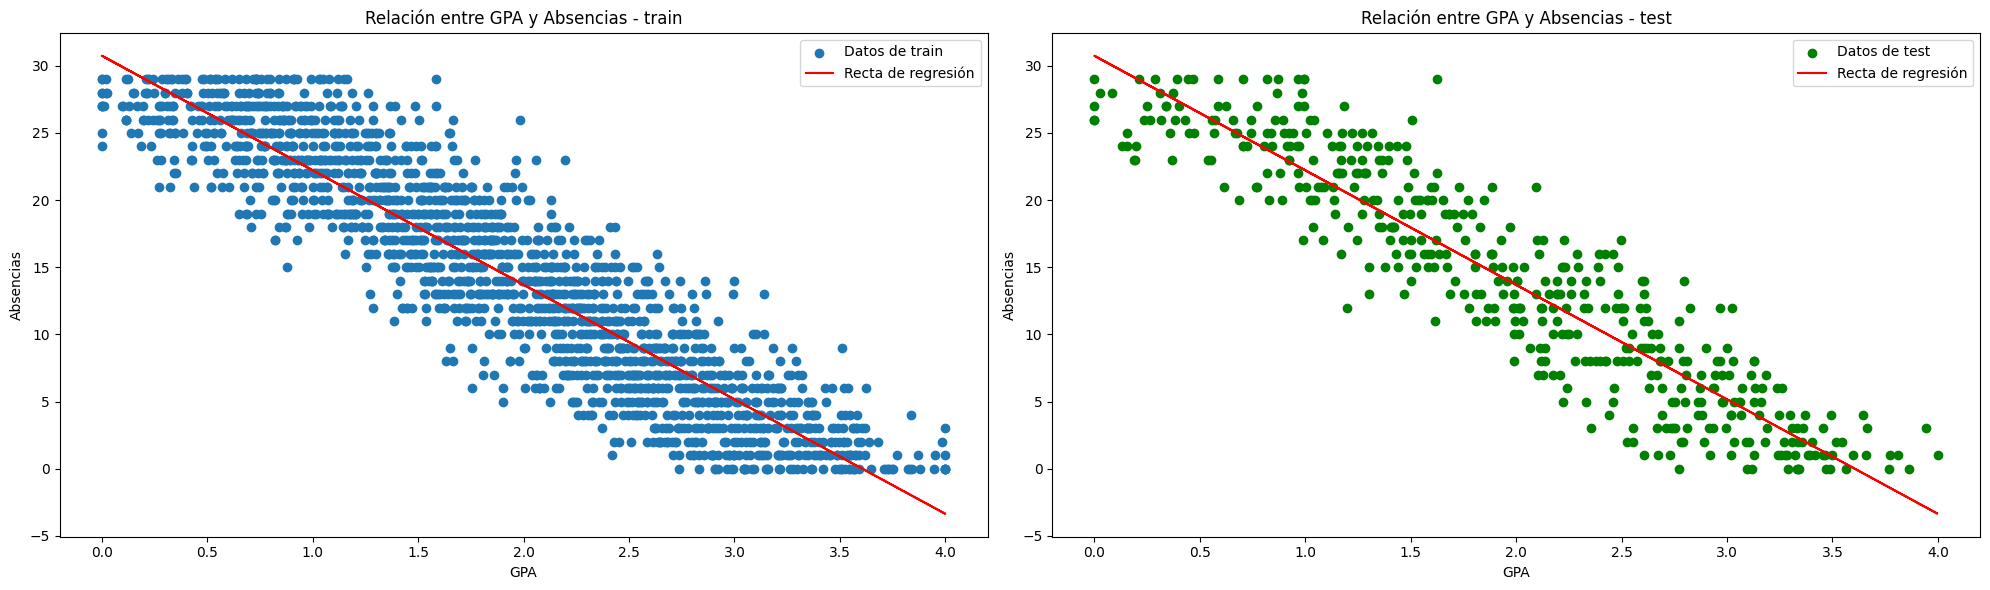

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


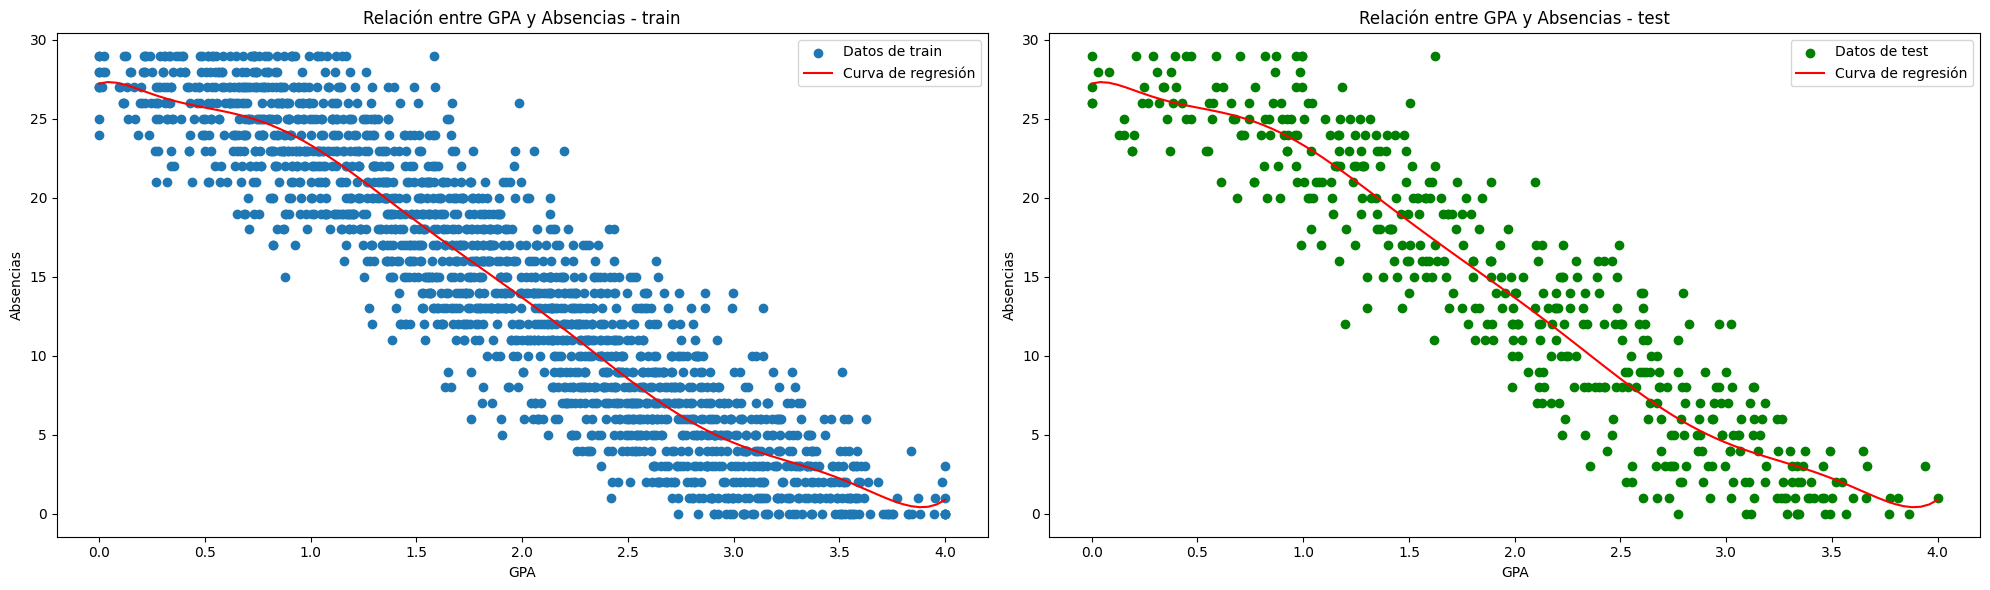

In [111]:
x_n = 'GPA'
y_n = 'Absences'

x = pd.Series(df[x_n])
y = pd.Series(df[y_n])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=42)

models = {'Regresión Lineal': regresion_lineal(X_train, X_test, y_train, y_test, x_n, y_n),
              'Regresión Polinomica': regresion_polinomica(X_train, X_test, y_train, y_test, x_n, y_n),
              #'Regresión Neuronal': regresion_neuronal(x, y, x_n, y_n),
}

comparison = compare_models(models)

In [112]:
comparison

,Modelo,MSE,R2,MAE,RMSE,Predicciones
0,Regresión Lineal,10.453535,0.854598,2.609248,3.233193,"[[21.597169896672696], [11.939026420079639], [..."
1,Regresión Polinomica,9.655626,0.865697,2.492075,3.107350,"[[22.7219603201247], [11.610071779568774], [20..."


ValueError: x and y must have same first dimension, but have shapes (2319,) and (464, 1)

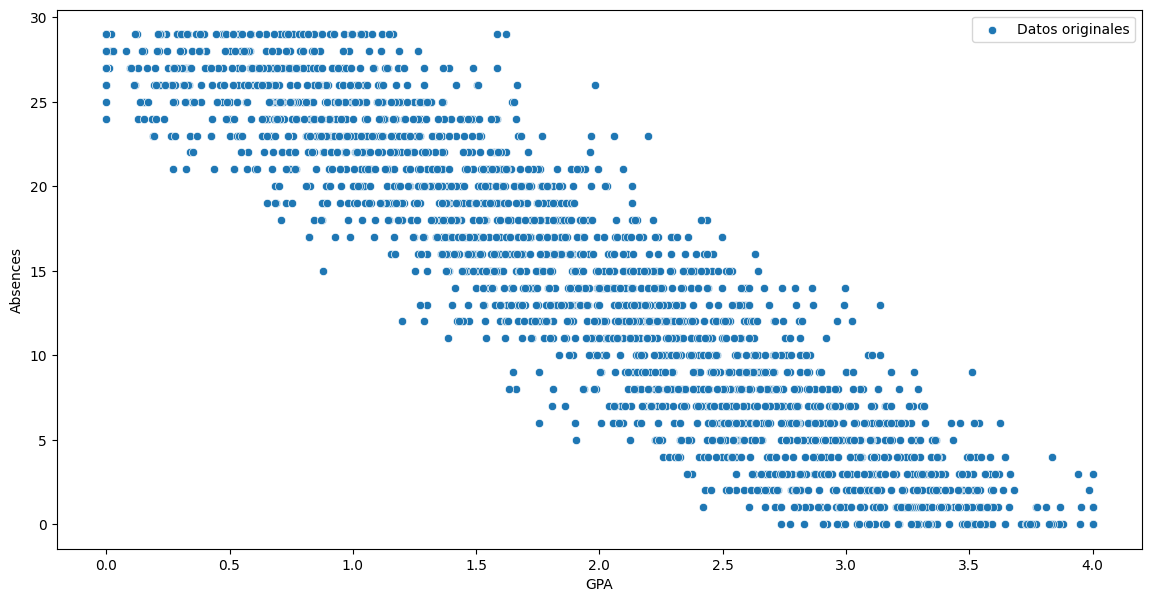

In [113]:
import random

# Cargar una paleta de colores de seaborn
palette = sns.color_palette("husl", n_colors=len(comparison))

def get_color(index):
    return palette[index]

comparison = comparison.iloc[::-1]

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x=x_n,  y=y_n, label='Datos originales')

# Agregar las predicciones de cada modelo
for index, row in comparison.iterrows():
    Modelo = row['Modelo']
    mse = row['MSE']
    r2 = row['R2']
    mae = row['MAE']
    rmse = row['RMSE']
    
    y_pred = row['Predicciones']
    # plt.plot(x, y_pred, color=random_color(), label=f'{Modelo} (MSE: {mse:.2f}, R2: {r2:.2f})')
    plt.plot(x, y_pred, color=get_color(index), label=f'{Modelo}')


plt.title('Comparación de Modelos de Regresión')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.legend()
plt.savefig('./graph/Comparacion_de_Modelos_de_Regression.png')
plt.show()

## **<u> Clasificación (Predecir una clase - binaria / multinomial) </u>**

### Regresión con Árbol de Decisión

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
def compare_models_class(model_dict):
    results = []
    confusion_matrices = {}

    for name, (confusion, exactitud, precision, sensibilidad, f1) in model_dict.items():
        stats = [name, exactitud, precision, sensibilidad, f1]
        results.append(stats)
        confusion_matrices[name] = confusion    

    df_results = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    return df_results, confusion_matrices

def gen_graph_class(df_metricas):

    fig, ax = plt.subplots(2, 2, figsize=(14, 10))

    sns.barplot(x='Modelo', y='Accuracy', data=df_metricas, ax=ax[0, 0])
    ax[0, 0].set_title('Exactitud')

    sns.barplot(x='Modelo', y='Precision', data=df_metricas, ax=ax[0, 1])
    ax[0, 1].set_title('Precision')

    sns.barplot(x='Modelo', y='Recall', data=df_metricas, ax=ax[1, 0])
    ax[1, 0].set_title('Recall')

    sns.barplot(x='Modelo', y='F1 Score', data=df_metricas, ax=ax[1, 1])
    ax[1, 1].set_title('F1 Score')

    plt.tight_layout()
    plt.savefig('./graph/Modelos de Clasificacion.png')
    plt.show()

def gen_confusion_matrix(confusion_matrices):
    for model_name, confusion in confusion_matrices.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f'./graph/Matriz de Confusión - {model_name}.png')
        plt.show()

In [ ]:
def random_forest(X_train, X_test, y_train, y_test):
    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [ ]:
def maquina_vectores_soporte(X_train, X_test, y_train, y_test):
    modelo = SVC()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [ ]:
def arbol_decision(X_train, X_test, y_train, y_test):
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def red_neuronal_clasificacion(X_train, X_test, y_train, y_test):
    # Determinar el número de clases a partir de los datos
    num_classes = len(np.unique(y_train))
    input_dim = X_train.shape[1]
    
    # Convertir etiquetas a formato categórico (one-hot encoding)
    y_train_cat = to_categorical(y_train, num_classes=num_classes)
    y_test_cat = to_categorical(y_test, num_classes=num_classes)
    
    # Crear el modelo
    modelo = Sequential()
    modelo.add(Dense(64, input_dim=input_dim, activation='relu'))  # Capa oculta con 64 neuronas
    modelo.add(Dense(64, activation='relu'))  # Otra capa oculta con 64 neuronas
    modelo.add(Dense(num_classes, activation='softmax'))  # Capa de salida

    # Compilar el modelo
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, y_train_cat, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

    # Hacer predicciones
    y_pred_cat = modelo.predict(X_test)
    y_pred = y_pred_cat.argmax(axis=1)  # Convertir one-hot encoding a etiquetas

    # Calcular métricas
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return confusion, exactitud, precision, sensibilidad, f1


In [ ]:
def regresión_logistica(X_train, X_test, y_train, y_test):
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [ ]:
def k_nearest(X_train, X_test, y_train, y_test):
    modelo = KNeighborsClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [ ]:
def naive_bayes(X_train, X_test, y_train, y_test):
    modelo = GaussianNB()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [ ]:
x_n = 'ParentalEducation'
y_n = 'GradeClass'

X = df[[x_n]].values
y = df[y_n].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': random_forest(X_train, X_test, y_train, y_test),
    'Máquina de Vectores de Soporte': maquina_vectores_soporte(X_train, X_test, y_train, y_test),
    'Árbol de Decisión': arbol_decision(X_train, X_test, y_train, y_test),
    'Red Neuronal' : red_neuronal_clasificacion(X_train, X_test, y_train, y_test),
    'Regresión Logística': regresión_logistica(X_train, X_test, y_train, y_test),
    'K-Nearest Neighbors': k_nearest(X_train, X_test, y_train, y_test),
    'Naive Bayes': naive_bayes(X_train, X_test, y_train, y_test)
}

comparison, confusion_matrices = compare_models_class(models)
gen_graph_class(comparison)
gen_confusion_matrix(confusion_matrices)
comparison

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.